# 1. Data Exploration
### a. Load the dataset

In [1]:
import pandas as pd

In [2]:
# Load both datasets
train_data = pd.read_csv('Titanic_train.csv')
test_data = pd.read_csv('Titanic_test.csv')

In [3]:
# Display the first few rows
train_data.head(), test_data.head()

(   PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name     Sex   Age  SibSp  \
 0                            Braund, Mr. Owen Harris    male  22.0      1   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                             Heikkinen, Miss. Laina  female  26.0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                           Allen, Mr. William Henry    male  35.0      0   
 
    Parch            Ticket     Fare Cabin Embarked  
 0      0         A/5 21171   7.2500   NaN        S  
 1      0          PC 17599  71.2833   C85        C  
 2      0  STON/O2. 3101282   7.9250   NaN        S  
 3      0            113803  53.1000  C123        S  
 4      0            373450   8.0500

### b. Examine the features, types, and summary statistics

In [4]:
# Check data types and missing values
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [5]:
# Summary statistics
train_data.describe()
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### c. Visualizations (EDA)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

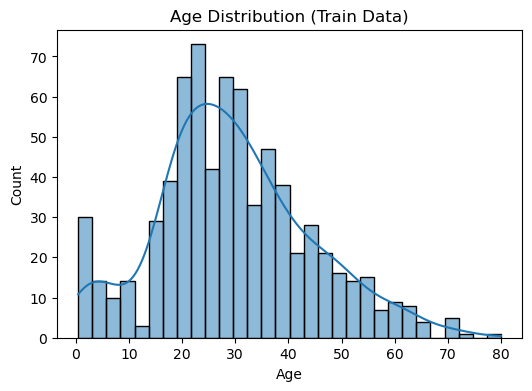

In [7]:
# Age distribution in Train Data
plt.figure(figsize=(6, 4))
sns.histplot(train_data['Age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution (Train Data)")
plt.show()

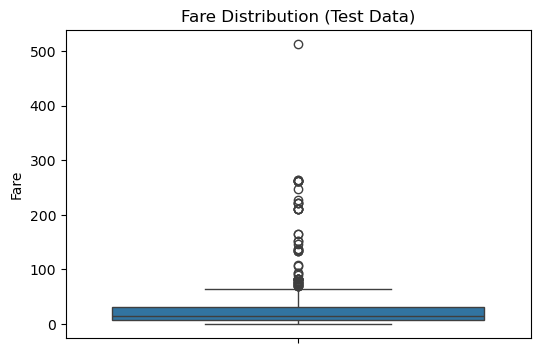

In [8]:
# Fare distribution in Test Data
plt.figure(figsize=(6, 4))
sns.boxplot(test_data['Fare'])
plt.title("Fare Distribution (Test Data)")
plt.show()

In [9]:
# Selecting only numeric columns
numeric_data = train_data.select_dtypes(include=['float64', 'int64'])

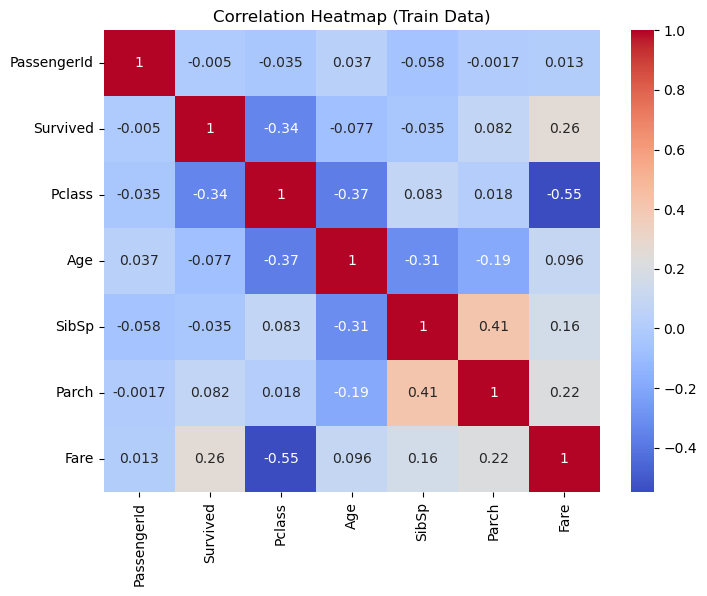

In [10]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Train Data)")
plt.show()

# 2. Data Preprocessing
### a. Handling Missing Values:

In [11]:
# Checking for missing values
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
# Handling missing values
# Fill missing values in 'Age' with median
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

# Fill missing values in 'Embarked' with mode
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)


In [14]:
# Dropping 'Cabin' column
train_data = train_data.drop('Cabin', axis=1, errors='ignore')
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


### b. Encoding Categorical Variables:

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()
le

LabelEncoder()

In [17]:
train_data['Sex'] = le.fit_transform(train_data['Sex'])
train_data['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32

In [18]:
train_data['Embarked'] = le.fit_transform(train_data['Embarked'])
train_data['Embarked']

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int32

# 3. Model Building
### a: Building Logistic Regression Model

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [20]:
# Features and Target
X = train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,28.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [21]:
y = train_data['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

### b: Splitting the Data into Train and Test:

In [22]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test

(     Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
 331       1    1  45.5      0      0   28.5000         2
 733       2    1  23.0      0      0   13.0000         2
 382       3    1  32.0      0      0    7.9250         2
 704       3    1  26.0      1      0    7.8542         2
 813       3    0   6.0      4      2   31.2750         2
 ..      ...  ...   ...    ...    ...       ...       ...
 106       3    0  21.0      0      0    7.6500         2
 270       1    1  28.0      0      0   31.0000         2
 860       3    1  41.0      2      0   14.1083         2
 435       1    0  14.0      1      2  120.0000         2
 102       1    1  21.0      0      1   77.2875         2
 
 [712 rows x 7 columns],
      Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
 709       3    1  28.0      1      1  15.2458         0
 439       2    1  31.0      0      0  10.5000         2
 840       3    1  20.0      0      0   7.9250         2
 720       2    0   6.0      0      1  33.0000   

In [23]:
# Model Building
model = LogisticRegression()

In [24]:
# Training the Model
model.fit(X_train, y_train)

LogisticRegression()

# 4: Model Evaluation

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
import matplotlib.pyplot as plt

### 1: Predict the Values

In [26]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [27]:
y_pred_proba = model.predict_proba(X_test)[:, 1]   # For ROC Curve
y_pred_proba

array([0.11390627, 0.22165729, 0.13487196, 0.88560389, 0.74516024,
       0.93064843, 0.67109018, 0.09120253, 0.74616845, 0.92077334,
       0.33317878, 0.06987857, 0.38834826, 0.15097962, 0.19752242,
       0.93638868, 0.29998368, 0.67113447, 0.24453382, 0.33024771,
       0.12128198, 0.40710583, 0.61645918, 0.13525666, 0.11053021,
       0.06856852, 0.47056651, 0.2227518 , 0.08118839, 0.59946831,
       0.13845337, 0.66303679, 0.5633641 , 0.6209941 , 0.14217091,
       0.12884605, 0.4574306 , 0.67109018, 0.94221198, 0.10889618,
       0.20102899, 0.08102404, 0.10893409, 0.13197685, 0.57927886,
       0.09119261, 0.13853271, 0.12493017, 0.12105383, 0.33792983,
       0.72341314, 0.80797968, 0.04078878, 0.51078898, 0.04699837,
       0.93204381, 0.21645183, 0.93210634, 0.77652949, 0.72855778,
       0.13131727, 0.85807526, 0.76447395, 0.45141735, 0.13197685,
       0.63401867, 0.31170807, 0.10597327, 0.14969141, 0.87521269,
       0.75517483, 0.94937424, 0.57784277, 0.90413315, 0.12455

### 2: Performance Metrics

In [28]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1 Score: 0.7638888888888888
ROC AUC Score: 0.8823680823680824


### 3: Confusion Matrix

In [29]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[90, 15],
       [19, 55]], dtype=int64)

### 4: Classification Report

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



### 5: ROC Curve Visualization

In [31]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
fpr, tpr, thresholds

(array([0.        , 0.        , 0.        , 0.02857143, 0.02857143,
        0.02857143, 0.03809524, 0.03809524, 0.0952381 , 0.0952381 ,
        0.1047619 , 0.1047619 , 0.11428571, 0.11428571, 0.14285714,
        0.14285714, 0.15238095, 0.15238095, 0.17142857, 0.17142857,
        0.19047619, 0.19047619, 0.2       , 0.2       , 0.21904762,
        0.21904762, 0.27619048, 0.27619048, 0.31428571, 0.31428571,
        0.37142857, 0.37142857, 0.47619048, 0.47619048, 0.5047619 ,
        0.5047619 , 0.58095238, 0.6       , 0.68571429, 0.68571429,
        0.72380952, 0.72380952, 0.74285714, 0.78095238, 0.82857143,
        0.82857143, 0.96190476, 0.96190476, 1.        ]),
 array([0.        , 0.01351351, 0.45945946, 0.45945946, 0.62162162,
        0.64864865, 0.64864865, 0.66216216, 0.66216216, 0.68918919,
        0.68918919, 0.7027027 , 0.7027027 , 0.71621622, 0.71621622,
        0.74324324, 0.74324324, 0.75675676, 0.75675676, 0.78378378,
        0.78378378, 0.82432432, 0.82432432, 0.83783784, 0.

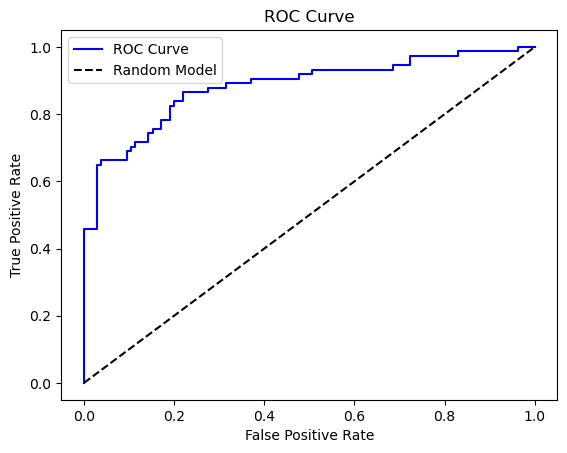

In [32]:
plt.plot(fpr, tpr, label="ROC Curve", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label="Random Model")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# 5. interpretation
### a: Interpretation of Logistic Regression Model

In [33]:
coefficients = model.coef_[0]
coefficients

array([-9.30724916e-01, -2.59671180e+00, -3.04300487e-02, -2.93864780e-01,
       -1.11821574e-01,  2.53314244e-03, -2.18843501e-01])

In [34]:
feature_names = X_train.columns
feature_names

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [35]:
coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coeff_df

,Feature,Coefficient
0,Pclass,-0.930725
1,Sex,-2.596712
2,Age,-0.030430
3,SibSp,-0.293865
4,Parch,-0.111822
5,Fare,0.002533
6,Embarked,-0.218844


In [36]:
coeff_df['Impact'] = coeff_df['Coefficient'].apply(lambda x: 'Positive' if x > 0 else 'Negative')
coeff_df['Impact']

0    Negative
1    Negative
2    Negative
3    Negative
4    Negative
5    Positive
6    Negative
Name: Impact, dtype: object

In [37]:
coeff_df.sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient,Impact
5,Fare,0.002533,Positive
2,Age,-0.030430,Negative
4,Parch,-0.111822,Negative
6,Embarked,-0.218844,Negative
3,SibSp,-0.293865,Negative
0,Pclass,-0.930725,Negative
1,Sex,-2.596712,Negative


### b: Discuss the Significance of Features

Positive Coefficient ➜ Increases the probability of survival.

Negative Coefficient ➜ Decreases the probability of survival.

Magnitude of Coefficient ➜ Shows the strength of the feature's impact.

In [38]:
import pickle

In [39]:
# Saving the model
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [40]:
import streamlit as st

In [43]:
st.title('Hello, World!')
st.write('Welcome to my first Streamlit app.')

In [42]:
# User Input
st.title('Titanic Survival Prediction')

2025-03-13 22:00:08.754 
  command:

    streamlit run C:\Users\Kruthika M\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()